In [1]:
import sys
import os
import xarray as xr
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['HOME'], 'Isca'))    # So can access functions in isca_tools which is in home/Isca directory
import isca_tools
import numpy as np
from isca_tools.utils import area_weighting
from isca_tools.plot import plot_spin_up

In [2]:
# Load dataset across all months for each depth value
depth_values = [1, 5, 10]    # mixed layer depths in meters
exp_names = [f'aquaplanet/spin_up/socrates/d{depth_values[i]}' for i in range(len(depth_values))]
datasets = [isca_tools.load_dataset(exp_name) for exp_name in exp_names]

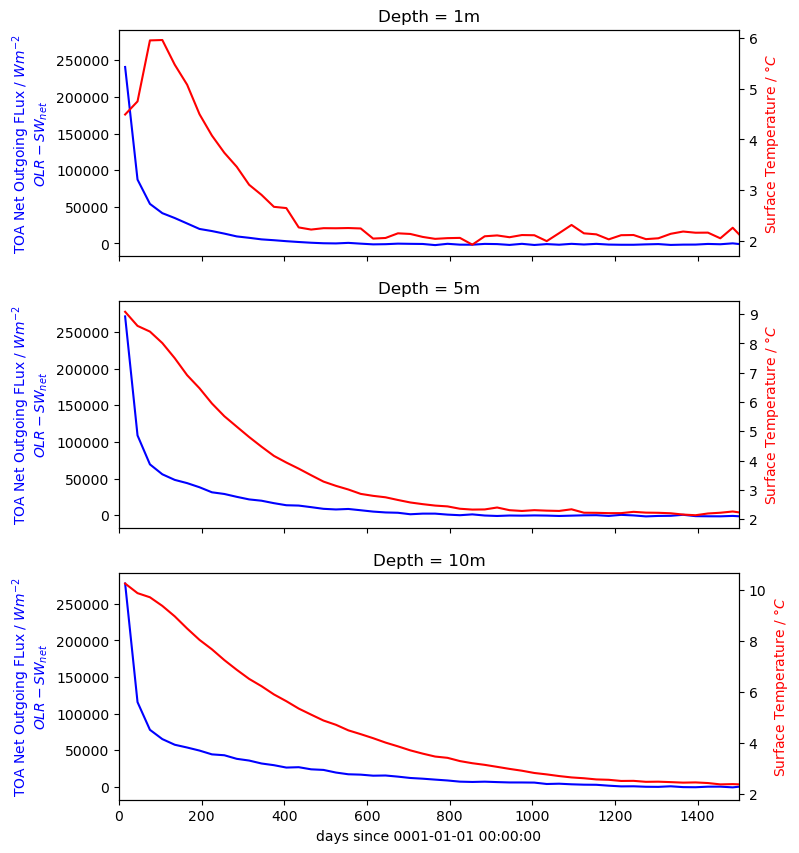

In [3]:
# Plot spinup time for each depth value
fig, axs = plt.subplots(3,1, figsize=(8, 10), sharex=True, sharey=True)
for i in range(len(datasets)):
    plot_spin_up(datasets[i].soc_olr, datasets[i].soc_toa_sw, datasets[i].t_surf, axs[i])
axs[0].set_xlim([0,1500]);
axs[0].set_xlabel('');
axs[1].set_xlabel('');
for i in range(len(depth_values)):
    axs[i].set_title(f"Depth = {depth_values[i]}m")